In [ ]:
# Graph sensor observations for K-State testbeds
# AP - Novemeber 2022


In [78]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column
from bokeh.palettes import Paired12 as colors
output_notebook()

Loading BokehJS ...

## All variables for one sensor at all testbed sites

In [72]:
def load_sensor_data(sensor):
    
    # Root URL for the repository data
    root = "https://raw.githubusercontent.com/soilwater/mist/main/data/Kansas_State_University"
    site_1 = pd.read_csv(f'{root}/CR300-23667_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    site_2 = pd.read_csv(f'{root}/CR300-10553_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    site_3 = pd.read_csv(f'{root}/CR300-23666_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    
    # Read units from one of the sites
    units = pd.read_csv(f'{root}/CR300-23667_Table_{sensor}.dat', skiprows=1, nrows=1, na_values="NAN").iloc[0].values
    
    skip_cols = 6
    variables = list(site_1.columns[skip_cols:])
    N = len(variables)
    
    fig, axs = plt.subplots(N, figsize=(15,4*N),squeeze=False)
    for k,var in enumerate(variables):
        axs[k,0].set_title(var.upper())
        axs[k,0].plot(site_1['TIMESTAMP'], site_1[var], label='Site 1')
        axs[k,0].plot(site_2['TIMESTAMP'], site_2[var], label='Site 2')
        axs[k,0].plot(site_3['TIMESTAMP'], site_3[var], label='Site 3')
        axs[k,0].set_ylabel(units[k+skip_cols])
        axs[k,0].legend()
        
    return axs


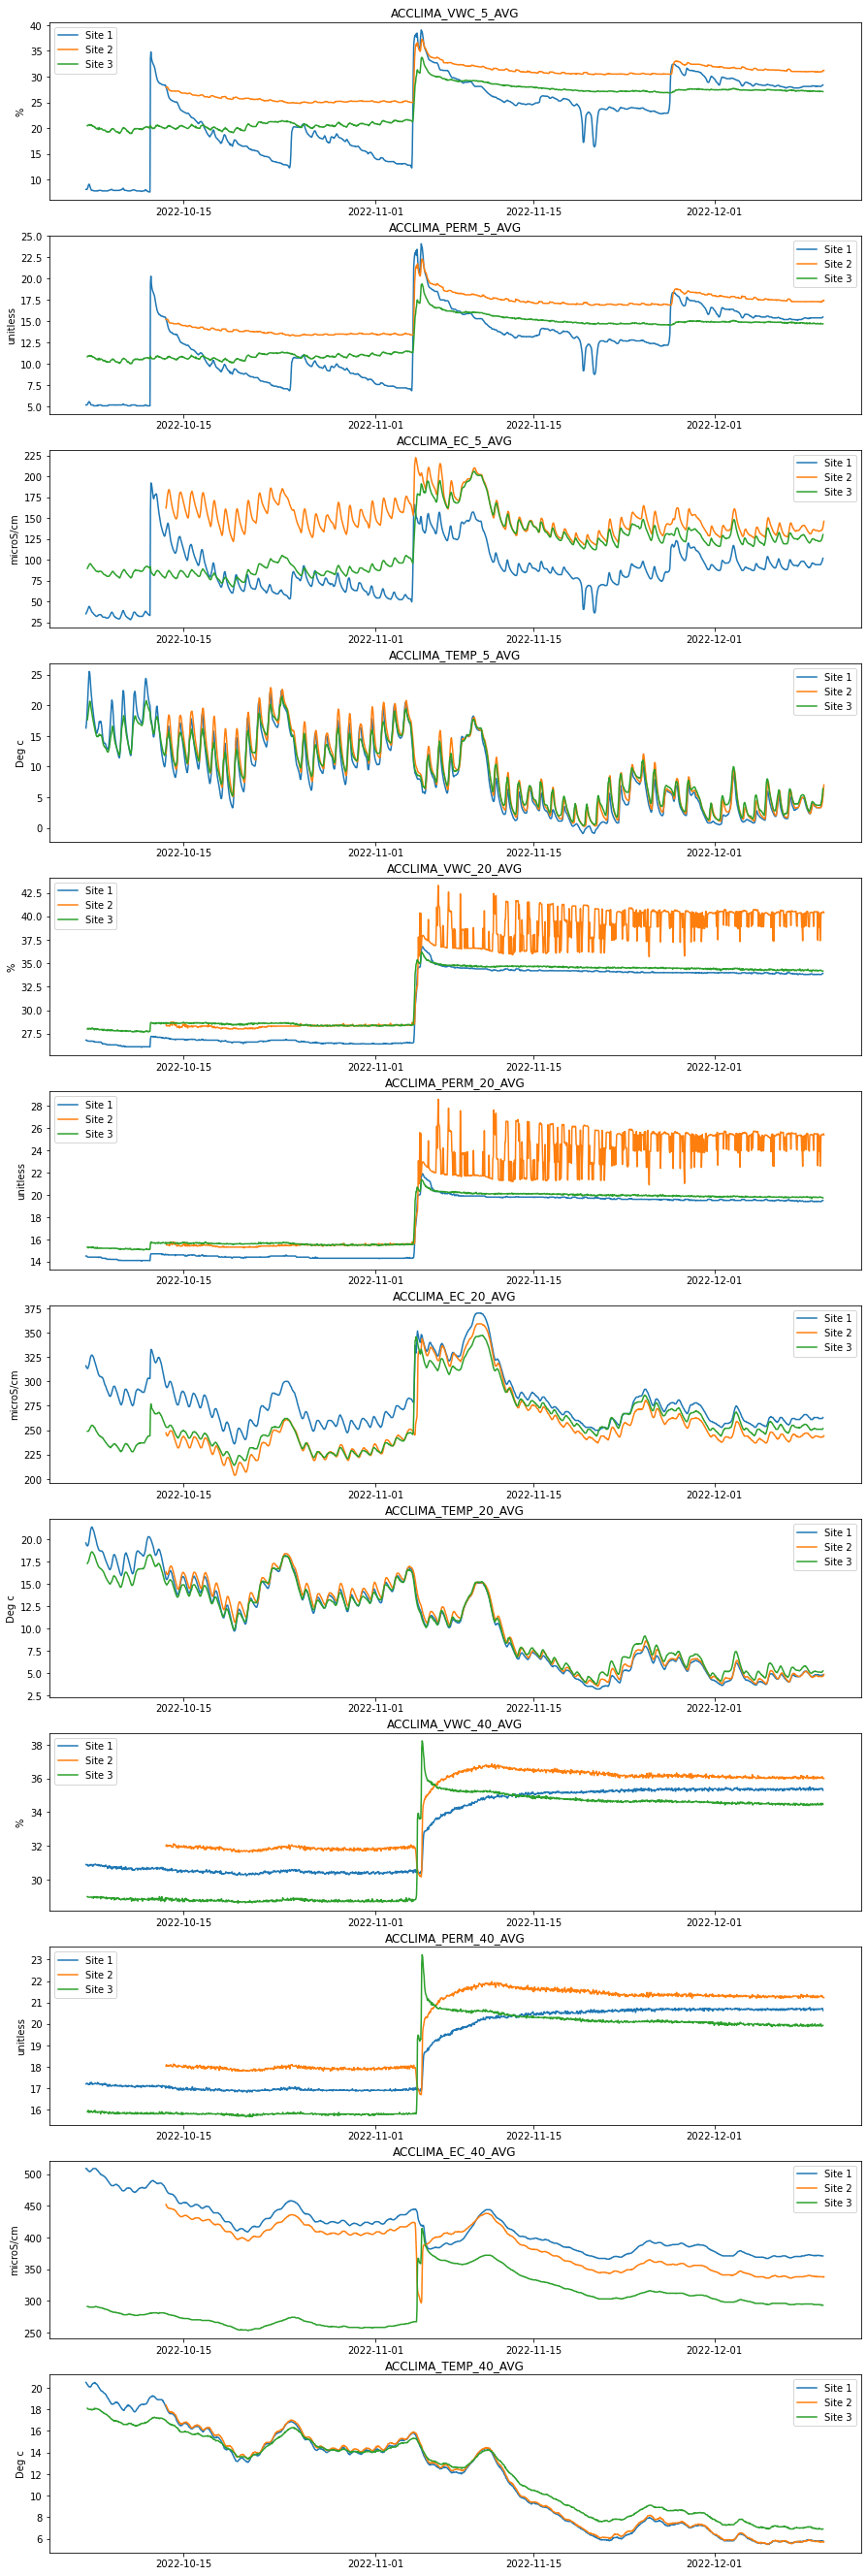

In [73]:
load_sensor_data('Acclima');

## All sensors for one site plotted by depth

In [75]:
# Define URL varaibles
root = "https://raw.githubusercontent.com/soilwater/mist/main/data/"
testbed = "Kansas_State_University"
site = "CR300-23667"


In [76]:
# Define sensor variables
sensors = {'Acclima':{'5':['Acclima_VWC_5_Avg','Acclima_Temp_5_Avg'],
                      '20':['Acclima_VWC_20_Avg','Acclima_Temp_20_Avg'],
                      '40':['Acclima_VWC_40_Avg','Acclima_Temp_40_Avg']},
           'Teros12':{'5':['Teros12_VWC_5_Avg','Teros12_Temp_5_Avg'],
                      '20':['Teros12_VWC_20_Avg','Teros12_Temp_20_Avg'],
                      '40':['Teros12_VWC_40_Avg','Teros12_Temp_40_Avg']},
           'Teros21':{'5':['Teros21_Matric_P_5_Avg','Teros21_Temp_5_Avg'],
                      '20':['Teros21_Matric_P_20_Avg','Teros21_Temp_20_Avg'],
                      '40':['Teros21_Matric_P_40_Avg','Teros21_Temp_40_Avg']},
           'Thetaprobe':{'5':['Thetaprobe_VWC_5_Avg'],
                         '20':['Thetaprobe_VWC_20_Avg'],
                         '40':['Thetaprobe_VWC_40_Avg']},
           'Hydraprobe':{'5':['Hydraprobe_VWC_5_Avg','Hydraprobe_Temp_5_Deg_C_Avg'],
                         '20':['Hydraprobe_VWC_20_Avg','Hydraprobe_Temp_20_Deg_C_Avg'],
                         '40':['Hydraprobe_VWC_40_Avg','Hydraprobe_Temp_40_Deg_C_Avg']},
           'CS655':{'5':['CS655_VWC_5_Avg','CS655_Temp_5_Avg'],
                    '20':['CS655_VWC_20_Avg','CS655_Temp_20_Avg'],
                    '40':['CS655_VWC_40_Avg','CS655_Temp_40_Avg']},
           'SoilVue':{'5':['SoilVue_VWC_5_Avg','SoilVue_Temp_5_Avg'],
                      '20':['SoilVue_VWC_10_Avg','SoilVue_Temp_10_Avg','SoilVue_VWC_20_Avg','SoilVue_Temp_20_Avg'],
                      '40':['SoilVue_VWC_30_Avg','SoilVue_Temp_30_Avg','SoilVue_VWC_40_Avg','SoilVue_Temp_40_Avg','SoilVue_VWC_50_Avg','SoilVue_Temp_50_Avg']},
           'GroPoint':{'5':['GroPoint_VWC_0_15_Avg','GroPoint_Temp_3_Avg'],
                       '20':['GroPoint_VWC_15_30_Avg','GroPoint_Temp_10_Avg','GroPoint_Temp_20_Avg'],
                       '40':['GroPoint_VWC_30_45_Avg','GroPoint_Temp_30_Avg','GroPoint_Temp_40_Avg','GroPoint_Temp_45_Avg']},
           'DrillDrop':{'5':['DrillDrop_VWC_5_Avg','DrillDrop_Temp_5_Avg'],
                        '20':['DrillDrop_VWC_15_Avg','DrillDrop_Temp_15_Avg','DrillDrop_VWC_25_Avg','DrillDrop_Temp_25_Avg'],
                        '40':['DrillDrop_VWC_35_Avg','DrillDrop_Temp_35_Avg','DrillDrop_VWC_45_Avg','DrillDrop_Temp_45_Avg','DrillDrop_VWC_55_Avg','DrillDrop_Temp_55_Avg']},
    }



In [82]:
f_vwc_5 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")
f_vwc_20 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")
f_vwc_40 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")

f_temp_5 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")
f_temp_20 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")
f_temp_40 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")

f_matric_5 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")
f_matric_20 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")
f_matric_40 = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")

f_rain = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")
f_batt = figure(plot_width=1000, plot_height=400, x_axis_type='datetime', toolbar_location="above")

counter = 0
for sensor in sensors.keys():
    url = f"{root}/{testbed}/{site}_Table_{sensor}.dat"
    df = pd.read_csv(url,skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    
    counter += 1
    for var in sensors[sensor]['5']:
        if 'VWC' in var:
            if df[var].mean() > 1:
                df[var] = df[var]/100
            f_vwc_5.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)

        if 'Temp' in var:
            f_temp_5.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)

        if 'Matric' in var:
            f_matric_5.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)


    for var in sensors[sensor]['20']:
        if 'VWC' in var:
            if df[var].mean() > 1:
                df[var] = df[var]/100
            f_vwc_20.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)

        if 'Temp' in var:
            f_temp_20.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)

        if 'Matric' in var:
            f_matric_20.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)

    for var in sensors[sensor]['40']:
        if 'VWC' in var:
            if df[var].mean() > 1:
                df[var] = df[var]/100
            f_vwc_40.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)

        if 'Temp' in var:
            f_temp_40.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)

        if 'Matric' in var:
            f_matric_40.line(df['TIMESTAMP'],df[var],legend_label=var, color=colors[counter], line_width=2)
        
url_rain = f"{root}/{testbed}/{site}_Table_TE525MM.dat"
df_rain = pd.read_csv(url_rain,skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
f_rain.step(df_rain['TIMESTAMP'],df_rain['TE525MM_Rain_Tot'],legend_label=var, color='black',line_width=2)
f_rain.yaxis.axis_label = 'Precipitation (mm/h)'

url_batt = f"{root}/{testbed}/{site}_Table_Batt.dat"
df_batt = pd.read_csv(url_batt,skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
f_batt.line(df_batt['TIMESTAMP'],df_batt['Batt_Min'],legend_label=var, color='black',line_width=2)
f_batt.yaxis.axis_label = 'Battery (Voltage)'

f_vwc_5.legend.location = "bottom_left"
f_vwc_5.legend.click_policy="hide"
f_vwc_5.add_layout(f_vwc_5.legend[0], 'right')
f_vwc_5.yaxis.axis_label = 'VWC (vol/vol)'

f_vwc_20.legend.location = "bottom_left"
f_vwc_20.legend.click_policy="hide"
f_vwc_20.add_layout(f_vwc_20.legend[0], 'right')
f_vwc_20.yaxis.axis_label = 'VWC (vol/vol)'

f_vwc_40.legend.location = "bottom_left"
f_vwc_40.legend.click_policy="hide"
f_vwc_40.add_layout(f_vwc_40.legend[0], 'right')
f_vwc_40.yaxis.axis_label = 'VWC (vol/vol)'

f_temp_5.legend.location = "bottom_left"
f_temp_5.legend.click_policy="hide"
f_temp_5.add_layout(f_temp_5.legend[0], 'right')
f_temp_5.yaxis.axis_label = 'Soil temperature (Celsius)'

f_temp_20.legend.location = "bottom_left"
f_temp_20.legend.click_policy="hide"
f_temp_20.add_layout(f_temp_20.legend[0], 'right')
f_temp_20.yaxis.axis_label = 'Soil temperature (Celsius)'

f_temp_40.legend.location = "bottom_left"
f_temp_40.legend.click_policy="hide"
f_temp_40.add_layout(f_temp_40.legend[0], 'right')
f_temp_40.yaxis.axis_label = 'Soil temperature (Celsius)'

f_matric_5.legend.location = "bottom_left"
f_matric_5.legend.click_policy="hide"
f_matric_5.add_layout(f_matric_5.legend[0], 'right')
f_matric_5.yaxis.axis_label = 'Matric potential (kPa)'

f_matric_20.legend.location = "bottom_left"
f_matric_20.legend.click_policy="hide"
f_matric_20.add_layout(f_matric_20.legend[0], 'right')
f_matric_20.yaxis.axis_label = 'Matric potential (kPa)'

f_matric_40.legend.location = "bottom_left"
f_matric_40.legend.click_policy="hide"
f_matric_40.add_layout(f_matric_40.legend[0], 'right')
f_matric_40.yaxis.axis_label = 'Matric potential (kPa)'

P = column(f_vwc_5,f_vwc_20,f_vwc_40,f_temp_5,f_temp_20,f_temp_40,f_matric_5,f_matric_20,f_matric_40,f_rain,f_batt)
show(P)
        